# Using Enron data-set, perform **3**  analysis.

In [145]:
# Importing necessary libraries
import re
import os
import matplotlib.pyplot as plt
import csv
from email.parser import Parser

Analysis 1 - Number of Emails sent by lay-k Chairman year wise

In [146]:
mailyearFunction=dict.fromkeys(range(2000,2002),0)
for root, dirs, files in os.walk('maildir/lay-k/_sent'):
        if "sent" in root:
            for file in files:
                with open(os.path.join(root,file),'r',encoding='utf-8',errors='ignore') as e_mail:
                    data=e_mail.read()
                    email=Parser().parsestr(data)
                    year=email["Date"][12:16]
                    year= int(year)
                   
                    if year in mailyearFunction:
                        mailyearFunction[year]+=1

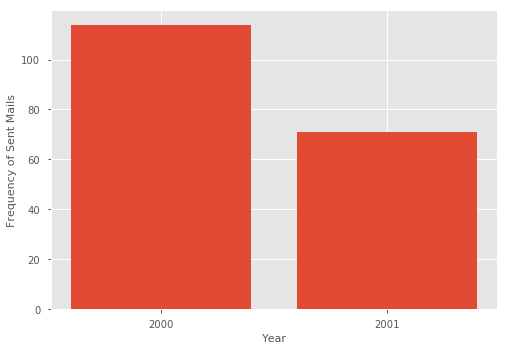

In [147]:
plt.style.use('ggplot')
plt.style.use('seaborn-notebook')
xaxis=mailyearFunction.keys()
yaxis=mailyearFunction.values()
plt.bar(range(len(mailyearFunction)),yaxis,align='center')
plt.xticks(range(len(mailyearFunction)),xaxis)
plt.ylabel('Frequency of Sent Mails')
plt.xlabel('Year')

plt.show()

Analysis 2

In [148]:
# Extracting Email's To list's of Chairman Kenneth Lay for analysis
def sent_email(location):
    
    sent_list = []    

    
    for file in os.listdir(location):
        with open(os.path.join(location, file), 'r',encoding='utf-8') as content_file:
            content = content_file.read()
            
            # To find only sent emails
            sent_list.append(re.findall('[\n\r].*To: \s*([^\n\r]*)', content)[0])
   

    sent_emailids_data = {}
   
    sent_emailids_data['To'] = sent_list
   
    return sent_emailids_data

# Read email from folders to dataframes
dataframe = sent_email('maildir/lay-k/_sent')


In [149]:
print ('Emails sent to below people by lay-k the Chairman of the company')

sentToList = dataframe['To']

for i in range(len(sentToList)):     # First Example
  
    print   ('To :' +sentToList[i])
   
    print('-------------------------------')

Emails sent to below people by lay-k the Chairman of the company
To :sherri.reinartz@enron.com
-------------------------------
To :lizard_ar@yahoo.com
-------------------------------
To :rob.bradley@enron.com
-------------------------------
To :michael@optsevents.com
-------------------------------
To :jaime.alatorre@enron.com
-------------------------------
To :loyal_lay@yahoo.com
-------------------------------
To :michael.mann@enron.com
-------------------------------
To :michael.mann@enron.com
-------------------------------
To :tori.wells@enron.com
-------------------------------
To :lizard_ar@yahoo.com
-------------------------------
To :ted.enloe@compaq.com
-------------------------------
To :lizard_ar@yahoo.com
-------------------------------
To :katherine.brown@enron.com
-------------------------------
To :mmfoss@uh.edu
-------------------------------
To :michael.hicks@enron.com
-------------------------------
To :chmoore1@email.msn.com
-------------------------------
To :dian

In [150]:
#Finding the frequency of emails
def freq_emails(mails):
    freq = {}
    for mail in mails:
        if mail not in freq:
            freq[mail] = 1
        else:
            freq[mail] += 1
    return freq


In [152]:
#Getting freqency of mail id's using freq_emails function
enron_chairamn_freq = freq_emails(sentToList)

#Sorting the emails with count in descending order
sortedlist = sorted(enron_chairamn_freq.items(), key = lambda x:x[1], reverse = True)
sortedlist

[('lizard_ar@yahoo.com', 10),
 ('jeffrey.garten@yale.edu', 8),
 ('katherine.brown@enron.com', 7),
 ('expense.report@enron.com', 6),
 ('skimmel@iexalt.net', 4),
 ('barbara.sain@compaq.com', 4),
 ('shea_dugger@i2.com', 4),
 ('jonathan.pershing@iea.org', 4),
 ('rob.bradley@enron.com', 3),
 ('mmfoss@uh.edu', 3),
 ('jeffrey.mcclellan@enron.com', 3),
 ('sherri.sera@enron.com', 3),
 ('mtelle@velaw.com', 3),
 ('stelzer@aol.com', 3),
 ('michael.mann@enron.com', 2),
 ('ted.enloe@compaq.com', 2),
 ('chmoore1@email.msn.com', 2),
 ('joe.hillings@enron.com', 2),
 ('dpeppers@flashfind.com', 2),
 ('sherrie@layfam.com, sally.keepers@enron.com', 2),
 ('bijangh2000@tavana.net', 2),
 ('colin.skellett@enron.com', 2),
 ('gary.fitch@enron.com', 2),
 ('amccarty@houston.org', 2),
 ('billy.dorsey@enron.com', 2),
 ('rebecca.mcdonald@enron.com', 2),
 ('barbara.paige@enron.com', 2),
 ('lindaeb@westcoal.org', 2),
 ('aculver@houston.org', 2),
 ('terrie.james@enron.com', 2),
 ('swhalen@calstate.edu', 2),
 ('godwin.ca

Storing the data in csv

In [153]:
with open('Enron_sentmail_layk_freq.csv', 'w', newline="") as csvfile:
    csv_output = csv.writer(csvfile)
    csv_output.writerow(['Mail Ids', 'Frequency'])
    for row in sortedlist:
        csv_output.writerow([row[0], row[1]])
        csvfile.close

Analysis 3 - To check which hour has he sent the most mails

In [154]:
hourFunction=dict.fromkeys(range(1,25),0)
for root, dirs, files in os.walk('maildir/lay-k/_sent'):
        if "sent" in root:
            for f in files:
                with open(os.path.join(root,f),'r',encoding='utf-8',errors='ignore') as e:
                    data=e.read()
                    email=Parser().parsestr(data)
                    hour=email["Date"][16:18]
                    hour= int(hour)
                   
                    if hour in hourFunction:
                        hourFunction[hour]+=1

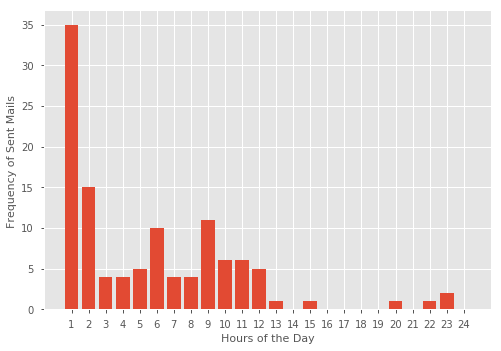

In [155]:
plt.style.use('ggplot')
plt.style.use('seaborn-notebook')
x=hourFunction.keys()
y=hourFunction.values()
plt.bar(range(len(hourFunction)),y,align='center')
plt.xticks(range(len(hourFunction)),x)
plt.ylabel('Frequency of Sent Mails ')
plt.xlabel('Hours of the Day')

plt.show()

Analysis has been written in a seperate "readme" file